In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
path_to_csv = 'retail_sales_dataset.csv'
df = pd.read_csv(path_to_csv)

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_sales = df['Total Amount'].std()

In [ ]:
print(f"\nDescriptive Statistics:")
print(f"Mean Total Amount: {mean_sales}")
print(f"Median Total Amount: {median_sales}")
print(f"Mode Total Amount: {mode_sales}")
print(f"Standard Deviation of Total Amount: {std_sales}")


Descriptive Statistics:
Mean Total Amount: 456.0
Median Total Amount: 135.0
Mode Total Amount: 50
Standard Deviation of Total Amount: 559.997631555123


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

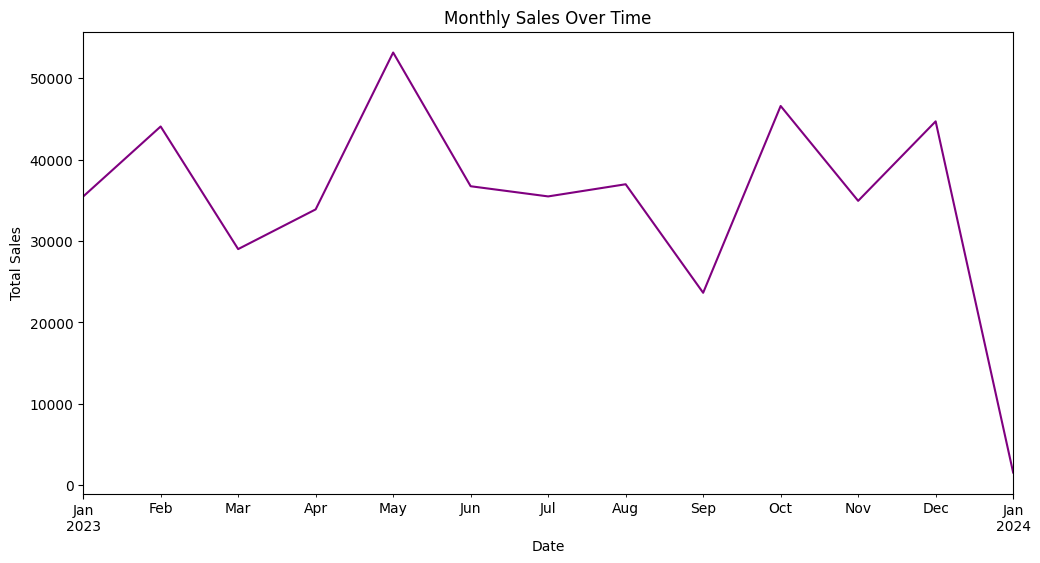

In [ ]:
monthly_sales = df['Total Amount'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Over Time', color='purple')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

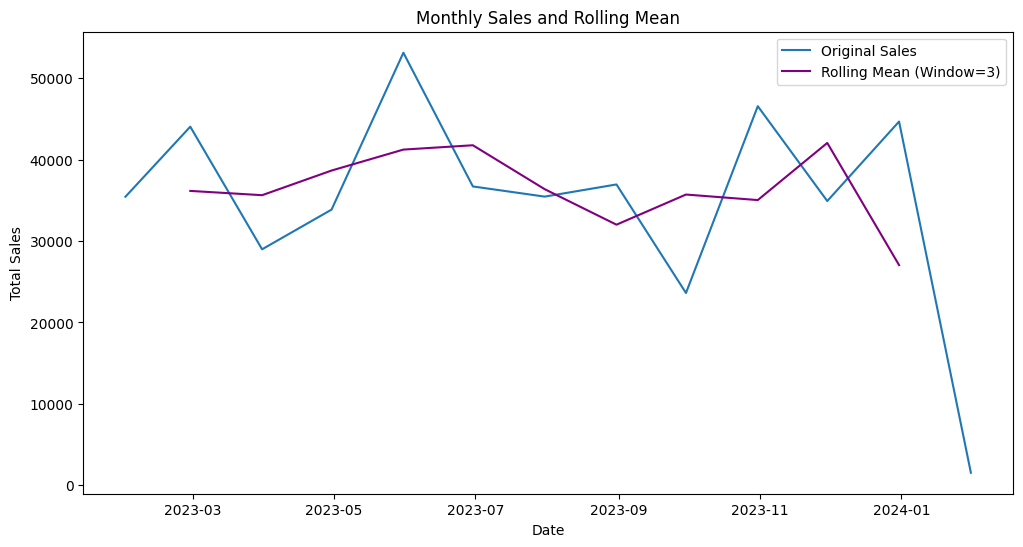

In [ ]:
rolling_mean = monthly_sales.rolling(window=3, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original Sales')
plt.plot(rolling_mean, color='purple', label='Rolling Mean (Window=3)')
plt.title('Monthly Sales and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [ ]:
customer_sales = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Total Amount': 'count'
}).rename(columns={'Total Amount': 'TotalSales', 'Total Amount': 'PurchaseCount'})

In [ ]:
print("\nCustomer Sales Analysis:")
print(customer_sales.head())


Customer Sales Analysis:
             PurchaseCount
Customer ID               
CUST001                  1
CUST002                  1
CUST003                  1
CUST004                  1
CUST005                  1


In [ ]:
product_performance = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).rename(columns={'Total Amount': 'TotalSales', 'Quantity': 'TotalQuantitySold'})

In [ ]:
print("\nProduct Performance Analysis:")
print(product_performance.head())


Product Performance Analysis:
                  TotalSales  TotalQuantitySold
Product Category                               
Beauty                143515                771
Clothing              155580                894
Electronics           156905                849


In [ ]:
top_products = product_performance.sort_values(by='TotalSales', ascending=False).head(2) # 'ascending=False' sorts in descending order
print("\n Top Best-Selling product Categories:")
print(top_products)


 Top Best-Selling product Categories:
                  TotalSales  TotalQuantitySold
Product Category                               
Electronics           156905                849
Clothing              155580                894


<ipython-input-34-73ff31bd5926>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, palette='viridis')


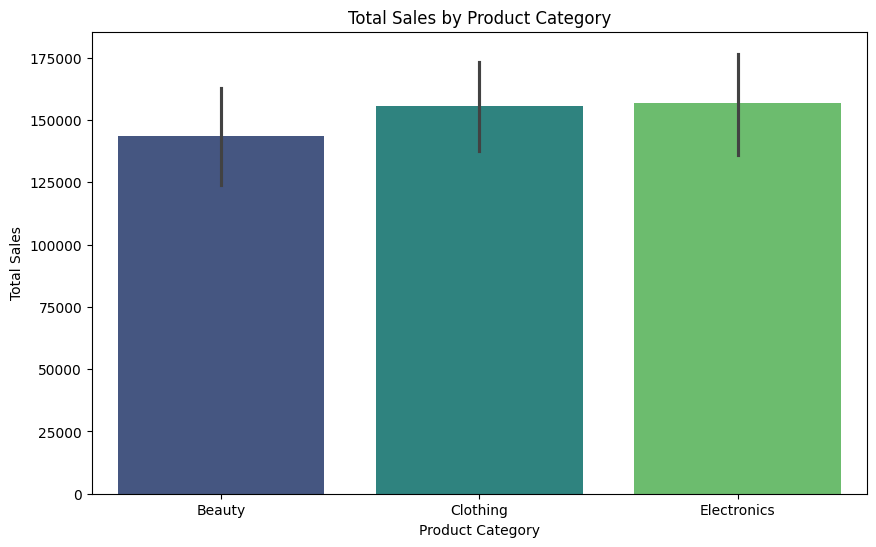

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

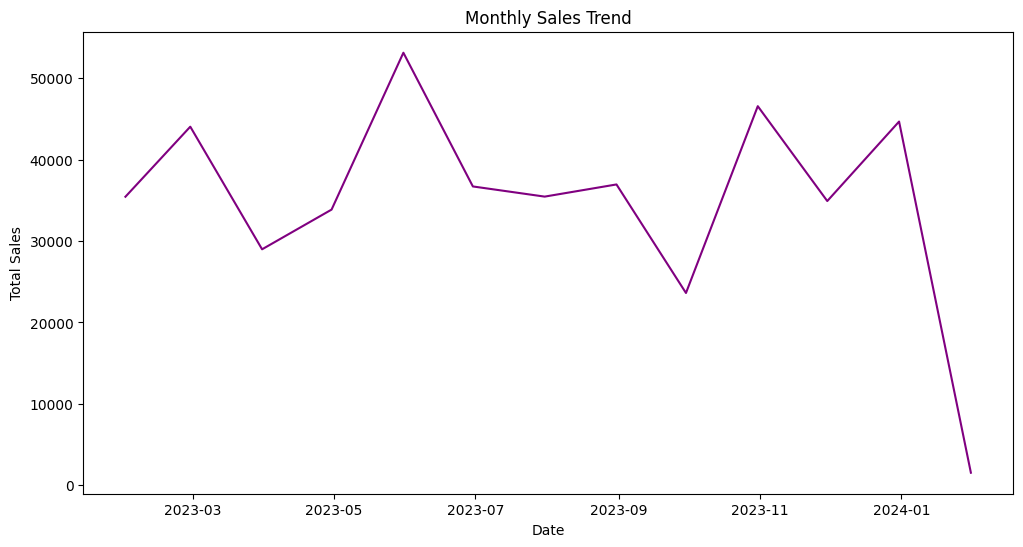

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

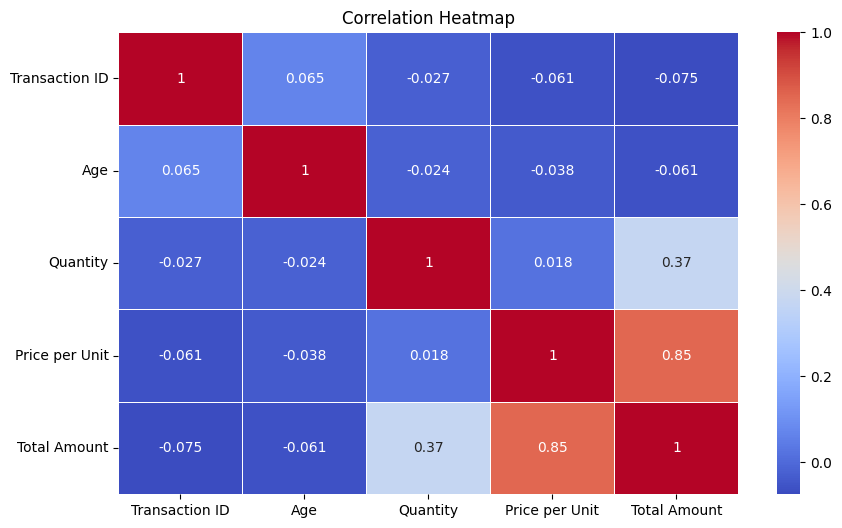

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print("\nRecommendations:")
print("""
1. Focus on high-performing products : Based on product analysis, continue to promote the top best-selling products to maintain or increase sales.
2. Seasonal marketing strategies : Implement targeted marketing campaigns during peak sales periods identified in the time series analysis.
3. Improve underperforming regions : Consider tailored strategies to boost sales in regions with lower performance as identified in the sales by region analysis.
4. Customer loyalty programs : Leverage customer sales data to create personalized loyalty programs that encourage repeat purchases among frequent buyers.
""")


Recommendations:

1. Focus on high-performing products : Based on product analysis, continue to promote the top best-selling products to maintain or increase sales.
2. Seasonal marketing strategies : Implement targeted marketing campaigns during peak sales periods identified in the time series analysis.
3. Improve underperforming regions : Consider tailored strategies to boost sales in regions with lower performance as identified in the sales by region analysis.
4. Customer loyalty programs : Leverage customer sales data to create personalized loyalty programs that encourage repeat purchases among frequent buyers.

